In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [116]:
df1 = pd.read_csv('penguins_size.csv')
target = df1['species']

In [12]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [7]:
df.dropna(inplace=True)

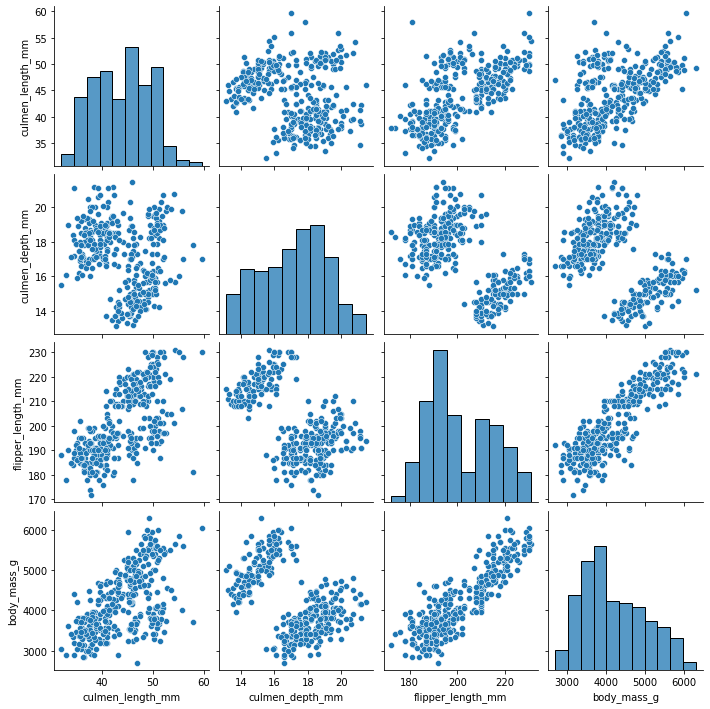

In [15]:
sns.pairplot(df)

<AxesSubplot:xlabel='species', ylabel='culmen_depth_mm'>

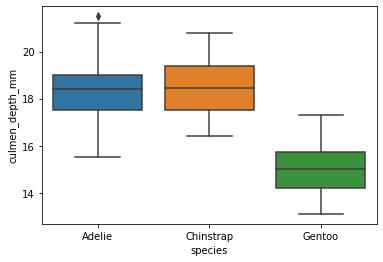

In [23]:
sns.boxplot(data=df,x='species',y='culmen_depth_mm')

In [24]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


<AxesSubplot:>

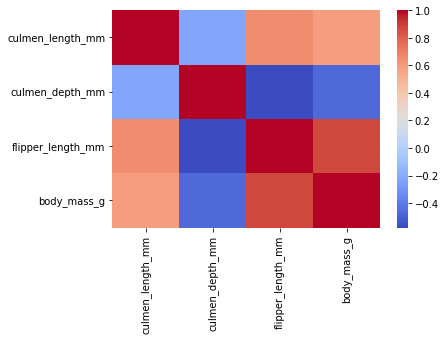

In [27]:
sns.heatmap(df.corr(),cmap='coolwarm')

<AxesSubplot:>

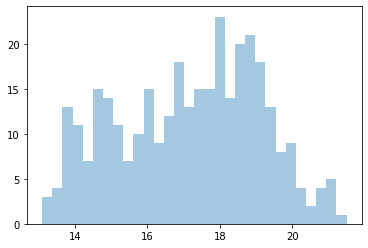

In [33]:
sns.distplot(x=df['culmen_depth_mm'],kde=False,bins=30)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [35]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [40]:
df['island'].value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [60]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [61]:
island_dummies = pd.get_dummies(df['island'],drop_first=True)
sex_dummies = pd.get_dummies(df['sex'],drop_first=True)

In [59]:
df[df.eq(".").any(1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [57]:
df.drop(index=336,inplace=True)

In [72]:
df.drop(['island','sex'],axis=1,inplace=True)

In [73]:
pd.concat([df1,island_dummies,sex_dummies],axis=1)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,0,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,0,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,0,0,1
342,Gentoo,45.2,14.8,212.0,5200.0,0,0,0


In [85]:
### Had to make the target call into numerical values

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [109]:
scaler.fit(df.drop('species',axis=1))

StandardScaler()

In [112]:
scaled_features = scaler.transform(df.drop('species',axis=1))
df = pd.DataFrame(scaled_features,columns=df.columns[1:])

In [81]:
kn = KNeighborsClassifier()

In [132]:
X = scaled_features
y= df1['species']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [134]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [92]:
def y_maker(col):
    if col == 'Adelie':
        return 0 
    elif col == 'Gentoo':
        return 1
    elif col == 'Chinstrap':
        return 2

In [117]:
df1['species'] = df1['species'].apply(y_maker)

In [135]:
pred = kn.predict(X_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      1.00      1.00        33
           2       1.00      0.93      0.96        27

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [137]:
print(confusion_matrix(y_test,pred))

[[40  0  0]
 [ 0 33  0]
 [ 2  0 25]]
